# Dataset Exploring and Visulaization

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from pandas import DataFrame, Series
%matplotlib inline



In [38]:
df = pd.read_json(r'C:\Users\Dell\Desktop\Data Science\Project\Whats Cooking\Whats Cooking\whats-cooking\train.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [39]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [40]:
df.shape

(39774, 3)

In [41]:
df.groupby('cuisine').size()

cuisine
brazilian        467
british          804
cajun_creole    1546
chinese         2673
filipino         755
french          2646
greek           1175
indian          3003
irish            667
italian         7838
jamaican         526
japanese        1423
korean           830
mexican         6438
moroccan         821
russian          489
southern_us     4320
spanish          989
thai            1539
vietnamese       825
dtype: int64

In [42]:
df.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [43]:
df2 = df[df.applymap(lambda x: x[0] if isinstance(x, list) else x).duplicated()]
df2.sum()

id             0.0
cuisine        0.0
ingredients    0.0
dtype: float64

In [44]:
df.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [45]:
df['cuisine'].value_counts(normalize=True) *100

italian         19.706341
mexican         16.186453
southern_us     10.861367
indian           7.550158
chinese          6.720471
french           6.652587
cajun_creole     3.886961
thai             3.869362
japanese         3.577714
greek            2.954191
spanish          2.486549
korean           2.086790
vietnamese       2.074219
moroccan         2.064163
british          2.021421
filipino         1.898225
irish            1.676975
jamaican         1.322472
russian          1.229446
brazilian        1.174134
Name: cuisine, dtype: float64

In [46]:
# Number of recipes per cuisine
totalCount = df['cuisine'].value_counts()
totalCount

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

Text(0.5, 1.0, 'Total Number of recipes per cuisine')

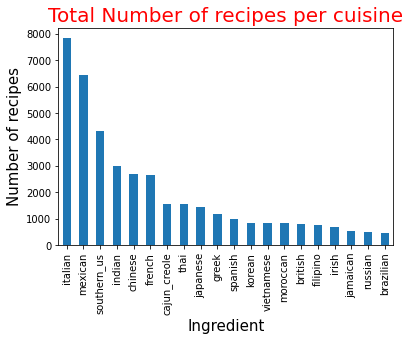

In [47]:
#Plot Bar Graph
plt = totalCount.plot(kind='bar', rot=90 , fontsize=10)
plt.set_xlabel('Ingredient', fontsize=15)
plt.set_ylabel('Number of recipes', fontsize=15)
plt.set_title('Total Number of recipes per cuisine', fontsize=20, color='red')

In [48]:
# Top 10 most occurring ingredients
def get_ingredients(data):
    all_ingredients = []
    for i in range(len(data)):
        if isinstance(data, pd.core.frame.DataFrame):
            all_ingredients.extend(data.loc[i, 'ingredients'])
        else:
            all_ingredients.extend(data.iloc[i])
    return Series(all_ingredients)


Text(0.5, 1.0, 'Most common ingredients')

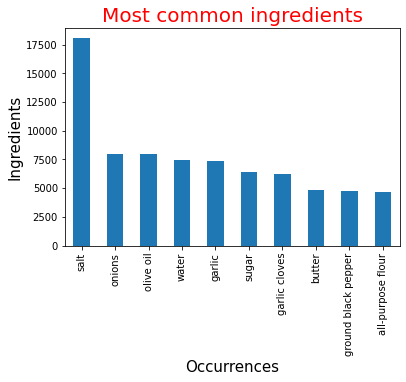

In [49]:
ingredients = get_ingredients(df["ingredients"])
plt = ingredients.value_counts()[:10].plot(kind='bar', rot=90,fontsize=10)
plt.set_xlabel('Occurrences', fontsize=15)
plt.set_ylabel('Ingredients', fontsize=15)
plt.set_title('Most common ingredients', fontsize=20 , color='red')


In [50]:
# Group all ingredients by cuisine
groupbyCuisine = df.groupby('cuisine')['ingredients'].sum()
groupbyCuisine

cuisine
brazilian       [ice cubes, club soda, white rum, lime, turbin...
british         [greek yogurt, lemon curd, confectioners sugar...
cajun_creole    [herbs, lemon juice, fresh tomatoes, paprika, ...
chinese         [low sodium soy sauce, fresh ginger, dry musta...
filipino        [eggs, pepper, salt, mayonaise, cooking oil, g...
french          [sugar, salt, fennel bulb, water, lemon olive ...
greek           [romaine lettuce, black olives, grape tomatoes...
indian          [water, vegetable oil, wheat, salt, black pepp...
irish           [cooking spray, salt, black pepper, yukon gold...
italian         [sugar, pistachio nuts, white almond bark, flo...
jamaican        [plain flour, sugar, butter, eggs, fresh ginge...
japanese        [sirloin, mirin, yellow onion, low sodium soy ...
korean          [jasmine rice, garlic, scallions, sugar, shiit...
mexican         [olive oil, purple onion, fresh pineapple, por...
moroccan        [ground cloves, whole nutmegs, ground ginger, ...
ru

In [51]:
#Count the number of times each ingredient appears in each cuisine
def frequencyItems(group):
    return dict(Series(group).value_counts())

frequency = groupbyCuisine.apply(frequencyItems)
frequency

cuisine
brazilian       {'salt': 194, 'onions': 133, 'olive oil': 118,...
british         {'salt': 407, 'all-purpose flour': 238, 'butte...
cajun_creole    {'salt': 743, 'onions': 529, 'garlic': 370, 'g...
chinese         {'soy sauce': 1363, 'sesame oil': 915, 'salt':...
filipino        {'salt': 421, 'garlic': 325, 'water': 310, 'on...
french          {'salt': 1203, 'sugar': 637, 'all-purpose flou...
greek           {'salt': 572, 'olive oil': 504, 'dried oregano...
indian          {'salt': 1934, 'onions': 1195, 'garam masala':...
irish           {'salt': 376, 'all-purpose flour': 219, 'butte...
italian         {'salt': 3454, 'olive oil': 3111, 'garlic clov...
jamaican        {'salt': 332, 'onions': 173, 'water': 153, 'ga...
japanese        {'soy sauce': 561, 'salt': 422, 'mirin': 402, ...
korean          {'soy sauce': 427, 'sesame oil': 403, 'garlic'...
mexican         {'salt': 2720, 'onions': 1493, 'ground cumin':...
moroccan        {'salt': 413, 'olive oil': 412, 'ground cumin'...
ru

In [52]:
# Get unique ingredients by cuisine
def removeDuplicatesItems(value):
    return list(set(value))

uniqueItems = groupbyCuisine.apply(removeDuplicatesItems)
uniqueItems

cuisine
brazilian       [frozen mango, sugar, olive oil, pizza sauce, ...
british         [sugar, olive oil, spelt flour, gooseberries, ...
cajun_creole    [poultry seasoning, chicken base, chicken meat...
chinese         [chicken base, tea bags, chicken meat, medium ...
filipino        [sugar, olive oil, chicken meat, won ton wrapp...
french          [chicken base, poultry seasoning, gala apples,...
greek           [frozen mango, olive oil, sugar, poultry seaso...
indian          [gooseberries, poultry seasoning, batter, pean...
irish           [back bacon rashers, olive oil, sugar, poultry...
italian         [poultry seasoning, italian sauce, turkey meat...
jamaican        [sugar, olive oil, poultry seasoning, chicken ...
japanese        [chicken base, gala apples, tea bags, baby rad...
korean          [sugar, olive oil, batter, gala apples, pilsne...
mexican         [chicken base, batter, chicken meat, chili sea...
moroccan        [olive oil, sugar, skinless chicken breasts, c...
ru

Text(0.5, 1.0, 'Unique ingredients by cuisine')

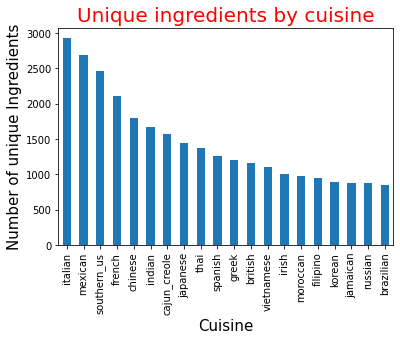

In [53]:
# Number of unique ingredients used by cuisine
x = uniqueItems.apply(len).sort_values(ascending=False)
plt = x.plot(kind='bar', rot=90, fontsize=10)
plt.set_xlabel('Cuisine', fontsize=15)
plt.set_ylabel('Number of unique Ingredients', fontsize=15)
plt.set_title('Unique ingredients by cuisine', fontsize=20 , color='red')

In [54]:
#Unique ingredients in the dataset
unique_ingredients = Series(get_ingredients(uniqueItems).unique())
count= len(unique_ingredients)
print('Total Unique ingredients =', count)

Total Unique ingredients = 6714


# Data Cleaning

In [55]:
#Make dummy of dataset
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
temp = DataFrame(mlb.fit_transform(df['ingredients']), columns=mlb.classes_, index=df.index)
temp.shape

(39774, 6714)

In [56]:
temp.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Join Original and Dummfied
df2 = df.iloc[:].reindex(['cuisine', 'id'], axis=1)
df_new = df2.join(temp)

df_new.shape

(39774, 6716)

In [58]:
df_new.head()

,cuisine,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,10259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,25693,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,20130,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,22213,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,13162,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Create a variable for recipe size 
df_new.insert(2, 'size_recipe', df_new.iloc[:, 2:].sum(axis=1))

df_new.shape

(39774, 6717)

In [60]:
df_new.head()

,cuisine,id,size_recipe,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,10259,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,25693,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,20130,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,22213,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,13162,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Partition the data in train and test sets
from sklearn.model_selection import train_test_split

t_size=0.2
seed=7
train, test = train_test_split(df_new, test_size=t_size, random_state=seed) #random_state = set.seed

print("Train dataset = " , len(train)) 
print("Test dataset = " , len(test))

Train dataset =  31819
Test dataset =  7955


In [62]:
train.head()

,cuisine,id,size_recipe,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
36287,brazilian,34876,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34352,indian,24471,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19167,southern_us,11888,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28769,thai,5133,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9683,greek,1501,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#reset index of train dataset
train.reset_index(inplace=True,drop=True)
train.shape

(31819, 6717)

In [64]:
train.head()

,cuisine,id,size_recipe,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,brazilian,34876,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,24471,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,southern_us,11888,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,thai,5133,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,greek,1501,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
test.head()

,cuisine,id,size_recipe,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
10304,british,8237,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20571,korean,24966,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37808,italian,26779,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6928,mexican,1512,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19575,thai,6492,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#reset index of test dataset
test.reset_index(inplace=True , drop=True)
test.shape

(7955, 6717)

In [67]:
test.head()

,cuisine,id,size_recipe,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,british,8237,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,korean,24966,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,italian,26779,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,mexican,1512,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,thai,6492,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Creates a DataFrame in the original format for train set to be manipulated
train_idx = train.index
df_train = df.loc[train_idx].reset_index(drop=True)

if (df_train.columns).contains('size_recipe'):
    df_train.head()
    df_train.shape
else:
    df_train.insert(2, 'size_recipe', df_train['ingredients'].apply(len))
    df_train.head()
    df_train.shape

AttributeError: 'Index' object has no attribute 'contains'

In [69]:
df_train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [70]:
# Number of recipes per cuisine
number_recipe_cuisine = df_train['cuisine'].value_counts()
number_recipe_cuisine

italian         6315
mexican         5148
southern_us     3472
indian          2400
chinese         2109
french          2099
thai            1226
cajun_creole    1213
japanese        1153
greek            929
spanish          787
moroccan         670
korean           656
vietnamese       655
british          646
filipino         605
irish            526
jamaican         429
russian          410
brazilian        371
Name: cuisine, dtype: int64

In [71]:
count = number_recipe_cuisine.sum()
print("Total number of Recipes = ", count)
total = len(number_recipe_cuisine)
print("Total cuisines = ", total)

Total number of Recipes =  31819
Total cuisines =  20


In [72]:
# Top 10 most occurring ingredients
all_ingredients = get_ingredients(df_train)
all_ingredients.value_counts()[:10]

salt                   14501
onions                  6384
olive oil               6362
water                   5931
garlic                  5881
sugar                   5103
garlic cloves           4966
butter                  3857
ground black pepper     3846
all-purpose flour       3736
dtype: int64

In [73]:
#Number of unique ingredients
number = len(set(all_ingredients))
print('Number of Unique Ingredients = ' , number)

Number of Unique Ingredients =  6311


In [74]:
# Group all ingredients by cuisine
all_ingredients_cuisine = df_train.groupby('cuisine')['ingredients'].sum()
all_ingredients_cuisine

cuisine
brazilian       [ice cubes, club soda, white rum, lime, turbin...
british         [greek yogurt, lemon curd, confectioners sugar...
cajun_creole    [herbs, lemon juice, fresh tomatoes, paprika, ...
chinese         [low sodium soy sauce, fresh ginger, dry musta...
filipino        [eggs, pepper, salt, mayonaise, cooking oil, g...
french          [sugar, salt, fennel bulb, water, lemon olive ...
greek           [romaine lettuce, black olives, grape tomatoes...
indian          [water, vegetable oil, wheat, salt, black pepp...
irish           [cooking spray, salt, black pepper, yukon gold...
italian         [sugar, pistachio nuts, white almond bark, flo...
jamaican        [plain flour, sugar, butter, eggs, fresh ginge...
japanese        [sirloin, mirin, yellow onion, low sodium soy ...
korean          [jasmine rice, garlic, scallions, sugar, shiit...
mexican         [olive oil, purple onion, fresh pineapple, por...
moroccan        [ground cloves, whole nutmegs, ground ginger, ...
ru

In [75]:
cuisine_count = all_ingredients_cuisine.apply(frequencyItems)
cuisine_count

cuisine
brazilian       {'salt': 153, 'onions': 108, 'olive oil': 96, ...
british         {'salt': 333, 'all-purpose flour': 192, 'butte...
cajun_creole    {'salt': 580, 'onions': 422, 'garlic': 290, 'b...
chinese         {'soy sauce': 1056, 'sesame oil': 723, 'corn s...
filipino        {'salt': 339, 'garlic': 263, 'onions': 259, 'w...
french          {'salt': 961, 'sugar': 498, 'all-purpose flour...
greek           {'salt': 445, 'olive oil': 393, 'dried oregano...
indian          {'salt': 1543, 'onions': 966, 'garam masala': ...
irish           {'salt': 309, 'butter': 177, 'all-purpose flou...
italian         {'salt': 2799, 'olive oil': 2499, 'garlic clov...
jamaican        {'salt': 269, 'onions': 142, 'water': 125, 'ga...
japanese        {'soy sauce': 456, 'salt': 345, 'mirin': 336, ...
korean          {'soy sauce': 342, 'sesame oil': 328, 'garlic'...
mexican         {'salt': 2202, 'onions': 1208, 'ground cumin':...
moroccan        {'olive oil': 335, 'salt': 334, 'ground cumin'...
ru

In [76]:
unique_ingredients_cuisine = all_ingredients_cuisine.apply(removeDuplicatesItems)
unique_ingredients_cuisine

cuisine
brazilian       [frozen mango, sugar, olive oil, stewed tomato...
british         [sugar, olive oil, spelt flour, mixed fruit, e...
cajun_creole    [poultry seasoning, chicken base, chicken meat...
chinese         [chicken base, tea bags, chicken meat, medium ...
filipino        [sugar, olive oil, chicken meat, won ton wrapp...
french          [chicken base, gala apples, tea bags, medium d...
greek           [olive oil, sugar, poultry seasoning, low-fat ...
indian          [gooseberries, poultry seasoning, batter, pean...
irish           [olive oil, sugar, poultry seasoning, low-fat ...
italian         [poultry seasoning, italian sauce, turkey meat...
jamaican        [sugar, olive oil, poultry seasoning, chicken ...
japanese        [tea bags, baby radishes, medium dry sherry, c...
korean          [sugar, olive oil, batter, gala apples, pilsne...
mexican         [chicken base, batter, chicken meat, chili sea...
moroccan        [olive oil, sugar, skinless chicken breasts, c...
ru

In [77]:
# Lists number of unique ingredients per cuisine
unique_ingredients_cuisine.apply(len).sort_values(ascending=False)

cuisine
italian         2723
mexican         2481
southern_us     2267
french          1897
chinese         1641
indian          1529
cajun_creole    1414
japanese        1322
thai            1259
spanish         1140
greek           1075
british         1048
vietnamese      1009
irish            900
moroccan         887
filipino         846
russian          805
korean           801
jamaican         776
brazilian        772
Name: ingredients, dtype: int64

In [78]:
# Get unique ingredients
unique_ingredients = get_ingredients(unique_ingredients_cuisine).unique()
number = len(unique_ingredients)
print("Unique ingredients = " , number)

Unique ingredients =  6311


In [79]:
def check_for_ingredient(my_dict, ingredient):
    result = {}
    for cuisine, list_ingredients in my_dict.items():
        if ingredient in list_ingredients:
            result[cuisine] = list_ingredients[ingredient]
    return result

In [80]:
# Number of times each ingredient appear in a cuisine
def number_cuisine_per_ingredient(unique):
    cuisines_count_per_ingredient = dict()
    for ingredient in unique:
        cuisines_count_per_ingredient[ingredient] = check_for_ingredient(cuisine_count, ingredient)
    return Series(cuisines_count_per_ingredient)
        
cuisines_count_per_ingredient = number_cuisine_per_ingredient(unique_ingredients)

cuisines_count_per_ingredient.head()

frozen mango                                        {'brazilian': 1}
sugar              {'brazilian': 50, 'british': 136, 'cajun_creol...
olive oil          {'brazilian': 96, 'british': 43, 'cajun_creole...
stewed tomatoes    {'brazilian': 1, 'cajun_creole': 26, 'french':...
chicken meat       {'brazilian': 1, 'cajun_creole': 2, 'chinese':...
dtype: object

In [81]:
# Extract cuisines from a dict
def extract_cuisine(my_series):
    return list(my_series.keys())

In [82]:
cuisines_per_ingredient = cuisines_count_per_ingredient.apply(extract_cuisine)
cuisines_per_ingredient[:10]

frozen mango                                                 [brazilian]
sugar                  [brazilian, british, cajun_creole, chinese, fi...
olive oil              [brazilian, british, cajun_creole, chinese, fi...
stewed tomatoes        [brazilian, cajun_creole, french, greek, india...
chicken meat           [brazilian, cajun_creole, chinese, filipino, g...
lime juice             [brazilian, british, cajun_creole, chinese, fi...
allspice berries       [brazilian, british, irish, italian, jamaican,...
canola                 [brazilian, cajun_creole, chinese, french, ind...
onion powder           [brazilian, british, cajun_creole, chinese, fi...
scotch bonnet chile    [brazilian, indian, jamaican, mexican, souther...
dtype: object

In [83]:
def get_common_ingredients(data):
    common = set(data.loc[data.index[0]])
    for cuisine in data.index[1:]:
        next_cuisine = set(data.loc[cuisine])
        common.intersection_update(next_cuisine)
    return list(common)

In [84]:
common_ingredients = get_common_ingredients(unique_ingredients_cuisine)
common_ingredients[:10]

['sugar',
 'olive oil',
 'tomato paste',
 'egg whites',
 'purple onion',
 'paprika',
 'vegetable oil',
 'pepper',
 'cayenne pepper',
 'flour']

In [85]:
number = len(common_ingredients)
print("Common ingredients = " , number)

Common ingredients =  91


In [86]:
#Remove ingredients from a list of ingredients
def remove_ingredients(series, remove):
    return list(set(series) - set(remove))

In [87]:
unique_ingredients_cuisine = unique_ingredients_cuisine.apply(remove_ingredients, remove=common_ingredients)
unique_ingredients_cuisine.apply(len).sort_values(ascending=False)

cuisine
italian         2632
mexican         2390
southern_us     2176
french          1806
chinese         1550
indian          1438
cajun_creole    1323
japanese        1231
thai            1168
spanish         1049
greek            984
british          957
vietnamese       918
irish            809
moroccan         796
filipino         755
russian          714
korean           710
jamaican         685
brazilian        681
Name: ingredients, dtype: int64

In [88]:
#Removes common ingredientes of the list all observation of all ingredients used in all recipes
all_ingredients = all_ingredients[~all_ingredients.isin(Series(common_ingredients))]
all_ingredients.reset_index(drop=True, inplace=True)
all_ingredients.value_counts()[:20]

soy sauce                 2613
tomatoes                  2458
ground cumin              2189
chili powder              1625
grated parmesan cheese    1501
sesame oil                1430
corn starch               1401
jalapeno chilies          1384
dried oregano             1354
chopped cilantro fresh    1347
diced tomatoes            1316
fresh parsley             1293
sour cream                1242
fresh ginger              1198
lime                      1133
fresh lime juice          1096
vanilla extract           1054
avocado                   1003
fish sauce                 997
dry white wine             989
dtype: int64

In [89]:
# Number of unique ingredients after removing common ingredients
count = len(set(all_ingredients))
print("Unique ingredients = ", count)

Unique ingredients =  6220


#  DataFrame Manipulation

In [90]:
df_train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [91]:
# Remove ingredients and zero ingredient recipes from a table
def remove_ingredients_from_table(df, ingredients_to_remove):
    new_df = df.copy()
    # Removes common ingredients from DataFrame
    new_df.loc[:, 'ingredients'] = new_df.loc[:, 'ingredients'].apply(remove_ingredients, remove=ingredients_to_remove)
    new_df.loc[:, 'size_recipe'] = new_df.loc[:, 'ingredients'].apply(len)
    
    if any(new_df['size_recipe'] == 0):     # Checks for zero ingredient recipes to remove
        new_df = new_df[new_df['size_recipe'] != 0]        # Removes zero ingredient recipes from DataFrame
        new_df.reset_index(drop=True, inplace=True)

    return new_df

In [92]:
df_train = remove_ingredients_from_table(df_train, common_ingredients)
df_train.head()

,id,cuisine,ingredients,size_recipe
0,10259,greek,"[grape tomatoes, romaine lettuce, feta cheese ...",5
1,25693,southern_us,"[plain flour, thyme, green tomatoes, yellow co...",5
2,20130,filipino,"[chicken livers, soy sauce, grilled chicken br...",5
3,22213,indian,[wheat],1
4,13162,indian,"[cornflour, garlic paste, ground cumin, chili ...",10


In [93]:
df_train.shape

(31664, 4)

In [94]:
# Method to remove ingredients and zero ingredient recipes
def remove_ingredients_from_table_dummified(df, ingredients_to_remove, drop_rows=True):
    # Remove ingredients from columns
    df = df.loc[:, ~df.columns.isin(ingredients_to_remove)]
    df.loc[:, 'size_recipe'] = df.iloc[:, 4:].sum(axis=1)     # Update size_recipe

    # Remove zero ingredient recipes left after removing common ingredients
    if drop_rows:
        df = df[df['size_recipe'] != 0]
        return df
    else:
        return df

In [95]:
df_train_new = remove_ingredients_from_table_dummified(df_new, common_ingredients)
df_train_new.head()

C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,cuisine,id,size_recipe,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini blossoms
0,greek,10259,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,25693,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,20130,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,22213,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,13162,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df_train_new.shape

(39580, 6626)

In [97]:
# Updates variables after removal of common ingredients from dataset
# Number of recipes per cuisine
number_recipe_cuisine = df_train['cuisine'].value_counts()
number_recipe_cuisine[:10]

italian         6296
mexican         5130
southern_us     3457
indian          2389
chinese         2106
french          2076
thai            1226
cajun_creole    1210
japanese        1151
greek            926
Name: cuisine, dtype: int64

In [98]:
all_ingredients = get_ingredients(df_train)
all_ingredients.value_counts()[:10]

soy sauce                 2613
tomatoes                  2458
ground cumin              2189
chili powder              1625
grated parmesan cheese    1500
sesame oil                1430
corn starch               1401
jalapeno chilies          1384
dried oregano             1353
chopped cilantro fresh    1347
dtype: int64

In [99]:
# Group all ingredients by cuisine after removing common ingredients
all_ingredients_cuisine = df_train.groupby('cuisine')['ingredients'].sum()
all_ingredients_cuisine

cuisine
brazilian       [lime, turbinado, ice cubes, club soda, white ...
british         [lemon curd, greek yogurt, confectioners sugar...
cajun_creole    [stock, chile pepper, red chili peppers, fresh...
chinese         [low sodium soy sauce, green beans, white pepp...
filipino        [chicken livers, soy sauce, grilled chicken br...
french          [lemon olive oil, grapefruit juice, fennel bul...
greek           [grape tomatoes, romaine lettuce, feta cheese ...
indian          [wheat, cornflour, garlic paste, ground cumin,...
irish           [low-fat sour cream, yukon gold potatoes, 1% l...
italian         [vanilla extract, dried cranberries, pistachio...
jamaican        [powdered sugar, plain flour, vanilla extract,...
japanese        [shiitake, mirin, low sodium soy sauce, corn o...
korean          [shiitake, sesame seeds, soy sauce, beansprout...
mexican         [iceberg lettuce, pork, poblano peppers, chopp...
moroccan        [whole nutmegs, ground coriander, ground clove...
ru

In [100]:
all_ingredient_by_cuisine_count = all_ingredients_cuisine.apply(frequencyItems)
all_ingredient_by_cuisine_count

cuisine
brazilian       {'lime': 70, 'tomatoes': 55, 'cachaca': 51, 'c...
british         {'baking soda': 60, 'vanilla extract': 49, 'wo...
cajun_creole    {'cajun seasoning': 231, 'dried thyme': 182, '...
chinese         {'soy sauce': 1056, 'sesame oil': 723, 'corn s...
filipino        {'soy sauce': 195, 'fish sauce': 86, 'cooking ...
french          {'dry white wine': 203, 'large egg yolks': 182...
greek           {'dried oregano': 216, 'feta cheese crumbles':...
indian          {'garam masala': 684, 'ground turmeric': 572, ...
irish           {'baking soda': 88, 'buttermilk': 56, 'cabbage...
italian         {'grated parmesan cheese': 1256, 'fresh basil'...
jamaican        {'ground allspice': 107, 'dried thyme': 84, 't...
japanese        {'soy sauce': 456, 'mirin': 336, 'sake': 239, ...
korean          {'soy sauce': 342, 'sesame oil': 328, 'sesame ...
mexican         {'ground cumin': 1058, 'chili powder': 994, 'j...
moroccan        {'ground cumin': 286, 'couscous': 111, 'ground...
ru

In [101]:
unique_ingredients_cuisine = all_ingredients_cuisine.apply(removeDuplicatesItems)
unique_ingredients_cuisine

cuisine
brazilian       [frozen mango, stewed tomatoes, chicken meat, ...
british         [spelt flour, mixed fruit, english walnuts, to...
cajun_creole    [poultry seasoning, chicken base, chicken meat...
chinese         [chicken base, tea bags, chicken meat, medium ...
filipino        [chicken meat, won ton wrappers, lime juice, o...
french          [chicken base, gala apples, tea bags, medium d...
greek           [poultry seasoning, low-fat buttermilk, pointe...
indian          [gooseberries, poultry seasoning, batter, pean...
irish           [poultry seasoning, low-fat buttermilk, gala a...
italian         [poultry seasoning, italian sauce, turkey meat...
jamaican        [skinless chicken breasts, poultry seasoning, ...
japanese        [tea bags, baby radishes, medium dry sherry, c...
korean          [batter, gala apples, pilsner, lime juice, oni...
mexican         [chicken base, batter, chicken meat, chili sea...
moroccan        [skinless chicken breasts, chopped fresh herbs...
ru

In [102]:
# Lists number of unique ingredients per cuisine
unique_ingredients_cuisine.apply(len).sort_values(ascending=False)

cuisine
italian         2632
mexican         2390
southern_us     2176
french          1806
chinese         1550
indian          1438
cajun_creole    1323
japanese        1231
thai            1168
spanish         1049
greek            984
british          957
vietnamese       918
irish            809
moroccan         796
filipino         755
russian          714
korean           710
jamaican         685
brazilian        681
Name: ingredients, dtype: int64

In [103]:
# Get unique ingredients
unique_ingredients = Series(get_ingredients(unique_ingredients_cuisine).unique())
unique_ingredients[:10]

0           frozen mango
1        stewed tomatoes
2           chicken meat
3             lime juice
4       allspice berries
5                 canola
6           onion powder
7    scotch bonnet chile
8             dried beef
9          potato starch
dtype: object

In [104]:
number = len(unique_ingredients)
print('Number of Unique ingredients after removing common ingredients = ' , number)

Number of Unique ingredients after removing common ingredients =  6220


In [105]:
# Number of cuisines each ingredient appears after removing common ingredients
cuisines_count_per_ingredient = number_cuisine_per_ingredient(unique_ingredients)
cuisines_count_per_ingredient[:20]

frozen mango                                                        {'brazilian': 1}
stewed tomatoes                    {'brazilian': 1, 'cajun_creole': 26, 'french':...
chicken meat                       {'brazilian': 1, 'cajun_creole': 2, 'chinese':...
lime juice                         {'brazilian': 16, 'british': 1, 'cajun_creole'...
allspice berries                   {'brazilian': 1, 'british': 2, 'irish': 1, 'it...
canola                             {'brazilian': 1, 'cajun_creole': 1, 'chinese':...
onion powder                       {'brazilian': 1, 'british': 6, 'cajun_creole':...
scotch bonnet chile                {'brazilian': 2, 'indian': 1, 'jamaican': 31, ...
dried beef                                            {'brazilian': 2, 'spanish': 1}
potato starch                      {'brazilian': 1, 'chinese': 12, 'french': 3, '...
pineapple juice                    {'brazilian': 1, 'cajun_creole': 1, 'chinese':...
boneless chicken skinless thigh    {'brazilian': 2, 'cajun_creole

In [106]:
# Cuisines in which each ingredient appears
cuisines_per_ingredient = cuisines_count_per_ingredient.apply(extract_cuisine)
cuisines_per_ingredient[:10]

frozen mango                                                 [brazilian]
stewed tomatoes        [brazilian, cajun_creole, french, greek, india...
chicken meat           [brazilian, cajun_creole, chinese, filipino, g...
lime juice             [brazilian, british, cajun_creole, chinese, fi...
allspice berries       [brazilian, british, irish, italian, jamaican,...
canola                 [brazilian, cajun_creole, chinese, french, ind...
onion powder           [brazilian, british, cajun_creole, chinese, fi...
scotch bonnet chile    [brazilian, indian, jamaican, mexican, souther...
dried beef                                          [brazilian, spanish]
potato starch          [brazilian, chinese, french, italian, japanese...
dtype: object

In [107]:
#  Top 10 ingredients per cuisine after removing common ingredients
top10 = Series()

for cuisine, list_ingredients in all_ingredient_by_cuisine_count.items():
    top10.loc[cuisine] = []
    for ingredient, occurrence in Series(list_ingredients)[:10].items():
        top10.loc[cuisine].append(ingredient)


df_top10 = DataFrame.from_items(zip(top10.index, top10.values)).T
df_top10.columns = ['top{}'.format(i) for i in range(1, 11)]
df_top10

<ipython-input-107-9c82b215f5cd>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  top10 = Series()


AttributeError: type object 'DataFrame' has no attribute 'from_items'

In [73]:
# Finds the cuisines with same name ingredients 
all_ingredients_same_name_cuisine = Series()

for cuisine, list_ingredients in all_ingredients_cuisine.items():
    all_ingredients_same_name_cuisine.loc[cuisine] = all_ingredients_same_name_cuisine.get(cuisine, [])
    for ingredient in list_ingredients:
        if cuisine in ingredient:
            all_ingredients_same_name_cuisine.loc[cuisine].append(ingredient)
            
all_ingredients_same_name_cuisine

brazilian                                                      []
british                                                        []
cajun_creole                                                   []
chinese         [chinese rice wine, chinese five-spice powder,...
filipino                                      [filipino eggplant]
french          [french bread, french bread, french fried onio...
greek           [greek yogurt, greek seasoning, greek yogurt, ...
indian                                        [indian flat bread]
irish           [irish cream liqueur, irish cream liqueur, iri...
italian         [italian seasoning, zesty italian dressing, it...
jamaican        [jamaican jerk season, jamaican jerk spice, ja...
japanese        [japanese eggplants, japanese rice, japanese r...
korean          [korean chile, korean chile paste, korean chil...
mexican         [crema mexicana, mexican chorizo, fresh mexica...
moroccan                                     [moroccan seasoning]
russian   

In [74]:
# Counts the number of recipes(occurrences) in which same cuisine/ingredients name appear
all_ingredients_same_name_cuisine.apply(len)

brazilian         0
british           0
cajun_creole      0
chinese         438
filipino          1
french           62
greek           167
indian            1
irish            22
italian         618
jamaican         33
japanese         37
korean           13
mexican          97
moroccan          1
russian           2
southern_us       0
spanish          68
thai            212
vietnamese       27
dtype: int64

In [75]:
# Number of recipes with same name ingredient
all_ingredients_same_name_cuisine.apply(len).sum(axis=0)

1799

In [76]:
all_ingredients_same_name_cuisine_count = all_ingredients_same_name_cuisine.apply(frequencyItems)
all_ingredients_same_name_cuisine_count

brazilian                                                      {}
british                                                        {}
cajun_creole                                                   {}
chinese         {'chinese five-spice powder': 178, 'chinese ri...
filipino                                 {'filipino eggplant': 1}
french          {'french bread': 47, 'french baguette': 8, 'fr...
greek           {'greek yogurt': 66, 'greek style plain yogurt...
indian                                   {'indian flat bread': 1}
irish               {'irish cream liqueur': 17, 'irish bacon': 5}
italian         {'italian seasoning': 280, 'italian sausage': ...
jamaican        {'jamaican jerk season': 16, 'jamaican jerk sp...
japanese        {'japanese rice': 16, 'japanese eggplants': 13...
korean          {'korean chile paste': 9, 'korean chile': 2, '...
mexican         {'mexican chocolate': 27, 'mexican chorizo': 2...
moroccan                                {'moroccan seasoning': 1}
russian   

In [77]:
#Lists of unique cuisine/ingredients names
unique_ingredients_same_name_cuisine = all_ingredients_same_name_cuisine.apply(removeDuplicatesItems)
unique_ingredients_same_name_cuisine

brazilian                                                      []
british                                                        []
cajun_creole                                                   []
chinese         [chinese plum sauce, chinese black mushrooms, ...
filipino                                      [filipino eggplant]
french          [french fri frozen, french bread, french fried...
greek           [whole milk greek yogurt, greek seasoning, gre...
indian                                        [indian flat bread]
irish                          [irish bacon, irish cream liqueur]
italian         [italian seasoning mix, italian eggplant, ital...
jamaican        [jamaican curry powder, jamaican jerk season, ...
japanese        [japanese eggplants, japanese rice, japanese c...
korean          [korean chile, korean buckwheat noodles, korea...
mexican         [crema mexicana, crema mexican, mexican style ...
moroccan                                     [moroccan seasoning]
russian   

In [78]:
# Number of unique ingredients per cuisine
unique_ingredients_same_name_cuisine.apply(len)

brazilian        0
british          0
cajun_creole     0
chinese         33
filipino         1
french           8
greek           12
indian           1
irish            2
italian         39
jamaican         8
japanese         4
korean           4
mexican          7
moroccan         1
russian          1
southern_us      0
spanish          5
thai             6
vietnamese       2
dtype: int64

In [79]:
# Total occurrences of same cuisine/ingredient name
sum = all_ingredients_same_name_cuisine_count.apply(len).sum()
print('Number of Instances of same cuisine name = ' , sum)

Number of Instances of same cuisine name =  134


In [80]:
# Get unique same name ingredients
unique_same_name_ingredients = Series(get_ingredients(unique_ingredients_same_name_cuisine).unique())
%store unique_same_name_ingredients

unique_same_name_ingredients[:10]

Stored 'unique_same_name_ingredients' (Series)


0           chinese plum sauce
1      chinese black mushrooms
2              chinese parsley
3             chinese pea pods
4    chinese five-spice powder
5             chinese pancakes
6           chinese roast pork
7               chinese celery
8          chinese wolfberries
9               chinese chives
dtype: object

In [81]:
number = len(unique_same_name_ingredients)
print('Number of Unique_ingredients = ' , number)

Number of Unique_ingredients =  134


In [82]:
# Number of times each same name ingredient appear in a cuisine
cuisines_count_per_same_name_ingredient = number_cuisine_per_ingredient(unique_same_name_ingredients)
cuisines_count_per_same_name_ingredient[:10]

chinese plum sauce                                              {'chinese': 3}
chinese black mushrooms                            {'chinese': 8, 'korean': 1}
chinese parsley                                  {'chinese': 2, 'filipino': 1}
chinese pea pods                                                {'chinese': 1}
chinese five-spice powder    {'chinese': 178, 'filipino': 2, 'french': 1, '...
chinese pancakes                                                {'chinese': 1}
chinese roast pork                                              {'chinese': 3}
chinese celery               {'chinese': 5, 'filipino': 1, 'thai': 2, 'viet...
chinese wolfberries                                             {'chinese': 1}
chinese chives               {'chinese': 12, 'japanese': 2, 'korean': 6, 't...
dtype: object

In [83]:
# Checks in how many other cuisines the same name cuisine-ingredients appear
# Get name of cuisine from dictionary with frequency in which they appear
cuisines_per_same_name_ingredient = cuisines_count_per_same_name_ingredient.apply(extract_cuisine)
cuisines_per_same_name_ingredient[:10]

chinese plum sauce                                                   [chinese]
chinese black mushrooms                                      [chinese, korean]
chinese parsley                                            [chinese, filipino]
chinese pea pods                                                     [chinese]
chinese five-spice powder    [chinese, filipino, french, indian, italian, j...
chinese pancakes                                                     [chinese]
chinese roast pork                                                   [chinese]
chinese celery                           [chinese, filipino, thai, vietnamese]
chinese wolfberries                                                  [chinese]
chinese chives                   [chinese, japanese, korean, thai, vietnamese]
dtype: object

In [84]:
# Number of cuisine each same name cuisine appears (first 10 ingredients)
cuisines_per_same_name_ingredient.apply(len)[:10]

chinese plum sauce           1
chinese black mushrooms      2
chinese parsley              2
chinese pea pods             1
chinese five-spice powder    9
chinese pancakes             1
chinese roast pork           1
chinese celery               4
chinese wolfberries          1
chinese chives               5
dtype: int64

# Data Modeling

In [110]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_train['all_ingredients'].values)
X.shape

(31664, 2887)

In [111]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 11, 16,
        9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,  5,
       16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,  9,
        9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9,  9])

# KNN

In [113]:
#KNN
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [114]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("KNN Accuracy: ",accuracy_score(y_test, predictions))

KNN Accuracy:  0.5755566082425391


In [115]:
print('Confusion Matrix: \n',confusion_matrix(y_test, predictions))

Confusion Matrix: 
 [[ 34   1   0   3   5   2   0   2   0   5   1   1   0  13   0   0   7   2
    0   2]
 [  2  31   1   3   0  24   0   1   6  17   1   0   1   9   2   6  23   1
    0   0]
 [  2   3 114  10   0  18   3   0   3  35   1   1   1  17   4   1  31   2
    0   0]
 [  0   0   0 261  12   6   2   8   2  11   0  34  31   9   1   0   8   0
   16  11]
 [  6   1   0  12  49   4   1   0   2   5   4   3   2   6   0   8  12   0
    3   3]
 [  0   9   6   7   2 151  15   3  13 104   0   1   1  18   3   8  36  11
    2   2]
 [  0   2   2   4   0   8  99   7   1  39   1   0   1   1   4   3  12   4
    1   1]
 [  5   8   1   9   3   8   9 283   0  20   6  13   1  41  27   1  19   2
    7   3]
 [  1   4   0   3   0  20   2   0  24  13   0   0   0   5   0   2  18   2
    1   0]
 [  4  15  15  21   4 117  30   9   8 871   1   3   1  38   5   6  73  25
    0   1]
 [  2   1   2   3   3   4   1   1   1   6  33   0   1   5   1   0   9   1
    0   1]
 [  1   3   1  28   3   8   1  15   1  12   1

In [116]:
print('Classification Report: \n',classification_report(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.44      0.44        78
           1       0.30      0.24      0.27       128
           2       0.59      0.46      0.52       246
           3       0.58      0.63      0.61       412
           4       0.45      0.40      0.43       121
           5       0.31      0.39      0.34       392
           6       0.54      0.52      0.53       190
           7       0.70      0.61      0.65       466
           8       0.26      0.25      0.26        95
           9       0.65      0.70      0.67      1247
          10       0.59      0.44      0.50        75
          11       0.56      0.51      0.53       249
          12       0.53      0.58      0.55       147
          13       0.73      0.78      0.75      1022
          14       0.45      0.39      0.42       137
          15       0.30      0.28      0.29        89
          16       0.55      0.57      0.56       720
  

In [117]:
# Trying results on different k values
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

MemoryError: Unable to allocate 1.00 GiB for an array with shape (5298, 25331) and data type float64

Text(0, 0.5, 'Error Rate')

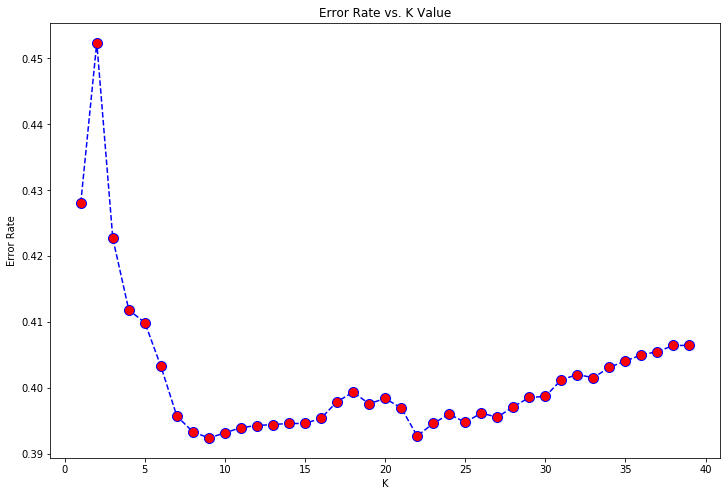

In [116]:
plt.figure(figsize=(12, 8))
        # X-axis, Y-asix
plt.plot(range(1, 40), error_rate, color="blue", linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [120]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("KNN Accuracy: ",accuracy_score(y_test, predictions))

KNN Accuracy:  0.607610926890889


In [124]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("KNN Accuracy: ",accuracy_score(y_test, predictions))

KNN Accuracy:  0.6072951207958314


# Logistic Regression

In [125]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(X_train, y_train)
pred = logistic.predict(X_test)

C:\Users\DC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [127]:
print('Logistic Regression Accuracy: ', accuracy_score(pred, y_test))

Logistic Regression Accuracy:  0.7686720353702826


In [129]:
print('Confusion Matrix: \n',confusion_matrix(y_test, pred))

Confusion Matrix: 
 [[  37    0    1    1    2    5    0    4    1    7    2    0    0   10
     0    0    3    2    4    0]
 [   0   51    1    1    1   18    1    2    5   14    0    1    1    2
     0    1   21    3    0    0]
 [   0    2  140    1    0   12    1    1    0   21    0    0    2    7
     0    2   43    1    0    1]
 [   1    1    2  378    8    5    0    1    0    7    1   11    6    5
     0    0    8    0    6    8]
 [   2    0    1   12   65    3    0    2    0    7    0    1    1    1
     0    0    7    1    0    4]
 [   0    4    3    0    1  269    4    3    1  100    1    1    0    3
     0    5   43    2    0    0]
 [   0    0    1    0    0    9  120    5    1   34    1    1    0    2
     4    0    3    4    0    0]
 [   0    1    0    1    1    2    7  430    1    6    0    1    0    9
     4    1    7    1    4    0]
 [   0    5    0    0    0   10    2    1   40   11    1    0    0    2
     0    0   30    0    0    0]
 [   0    3    8    1    0   46   1

In [130]:
print('Classification Report: \n',classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.47      0.58        79
           1       0.65      0.41      0.50       123
           2       0.75      0.60      0.67       234
           3       0.80      0.84      0.82       448
           4       0.68      0.61      0.64       107
           5       0.59      0.61      0.60       440
           6       0.73      0.65      0.69       185
           7       0.83      0.90      0.87       476
           8       0.62      0.39      0.48       102
           9       0.76      0.90      0.82      1207
          10       0.84      0.70      0.76        82
          11       0.85      0.71      0.77       234
          12       0.85      0.74      0.79       133
          13       0.90      0.90      0.90      1052
          14       0.90      0.72      0.80       144
          15       0.61      0.34      0.43        83
          16       0.66      0.79      0.72       664
  

# Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("RandomForest Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForest Accuracy: 0.7310911100584241


In [138]:
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[  39    2    1    2    3    1    2    2    0    6    0    0    0   15
     0    0    3    1    2    0]
 [   0   28    1    2    0   24    1    5    7   12    1    0    0    6
     0    0   33    3    0    0]
 [   1    2  127    0    0   14    0    1    0   25    0    3    1   19
     0    1   38    1    0    1]
 [   0    1    1  385    6    1    0    7    0    5    1    4    8    6
     0    1    8    0   11    3]
 [   3    0    1   21   47    3    0    2    1    8    1    2    0    2
     0    0    9    0    3    4]
 [   0    4    4    3    0  209    1    6    3  141    0    3    1   16
     1    6   36    5    0    1]
 [   0    0    1    2    0    7  111    4    1   48    0    0    0    4
     0    3    3    1    0    0]
 [   1    0    0    0    1    2    3  437    0    6    0    0    0   12
     3    1    7    0    3    0]
 [   1    2    0    3    0    9    4    1   31   12    1    0    0    2
     0    3   33    0    0    0]
 [   0    2    1    5    0   40   1

In [139]:
print('Classification Report: \n',classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.49      0.61        79
           1       0.60      0.23      0.33       123
           2       0.77      0.54      0.64       234
           3       0.72      0.86      0.78       448
           4       0.65      0.44      0.53       107
           5       0.53      0.47      0.50       440
           6       0.78      0.60      0.68       185
           7       0.77      0.92      0.84       476
           8       0.57      0.30      0.40       102
           9       0.72      0.89      0.79      1207
          10       0.84      0.56      0.67        82
          11       0.87      0.63      0.73       234
          12       0.83      0.71      0.76       133
          13       0.83      0.90      0.86      1052
          14       0.89      0.61      0.72       144
          15       0.53      0.33      0.40        83
          16       0.64      0.74      0.69       664
  

In [35]:
# Decision Tree

In [140]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, RepeatedKFold, train_test_split
Gini = DecisionTreeClassifier( criterion='gini' )


In [141]:
#Classifier without pruning using gini
CV = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 1)

CV2 = StratifiedShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

Acc_n_Std = cross_val_score(Gini, X, y, scoring='accuracy', cv=CV, n_jobs = -1)
print('Accuracy: ', np.mean(Acc_n_Std), ' Standard Deviation: ', np.std(Acc_n_Std))

Acc_n_Std = cross_val_score(Gini, X, y, scoring='accuracy', cv=CV2, n_jobs = -1)
print('Accuracy: ', np.mean(Acc_n_Std), ' Standard Deviation: ', np.std(Acc_n_Std))

Accuracy:  0.6405853817429068  Standard Deviation:  0.007714819259691977
Accuracy:  0.6348097268277277  Standard Deviation:  0.005896886085941548


In [118]:
#SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("SVC Accuracy: ", accuracy_score(y_test,y_pred))

SVC Accuracy:  0.7471972209063635
